C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index 

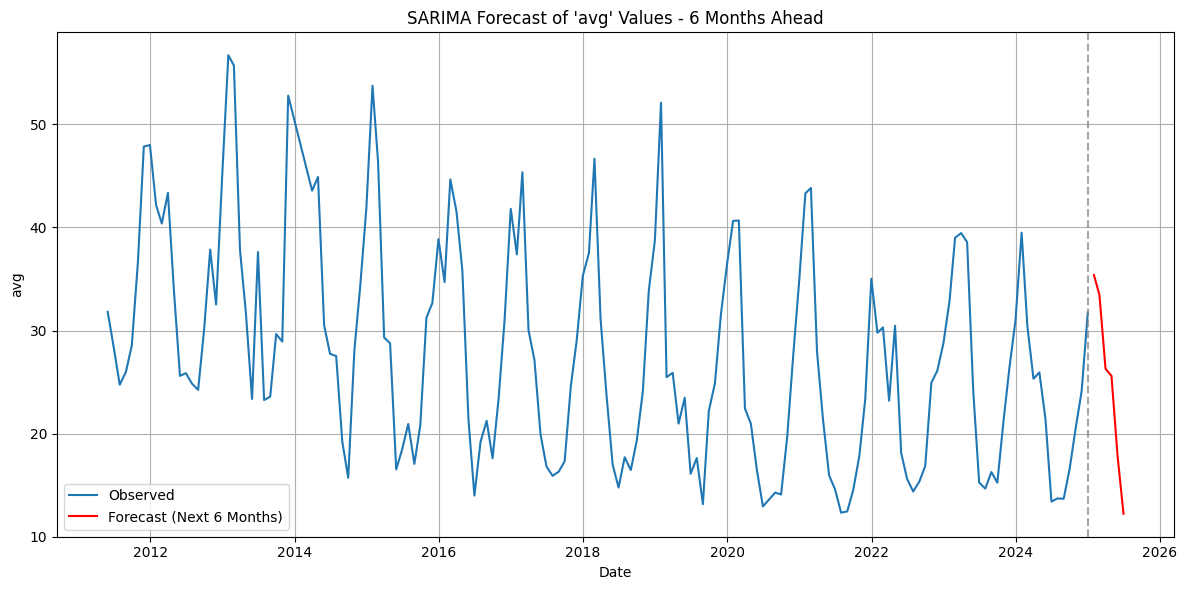

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

# Load the dataset
df = pd.read_csv('../../data/a1/pm_bangkok_avg.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

# Fit SARIMA model (monthly seasonality, so seasonal_order s=12)
model = SARIMAX(df['avg'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast next 6 months
forecast_steps = 6
future_dates = [df.index[-1] + DateOffset(months=i) for i in range(1, forecast_steps + 1)]
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg'], label='Observed')
plt.plot(future_dates, forecast_mean, color='red', label='Forecast (Next 6 Months)')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("SARIMA Forecast of 'avg' Values - 6 Months Ahead")
plt.xlabel("Date")
plt.ylabel("avg")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


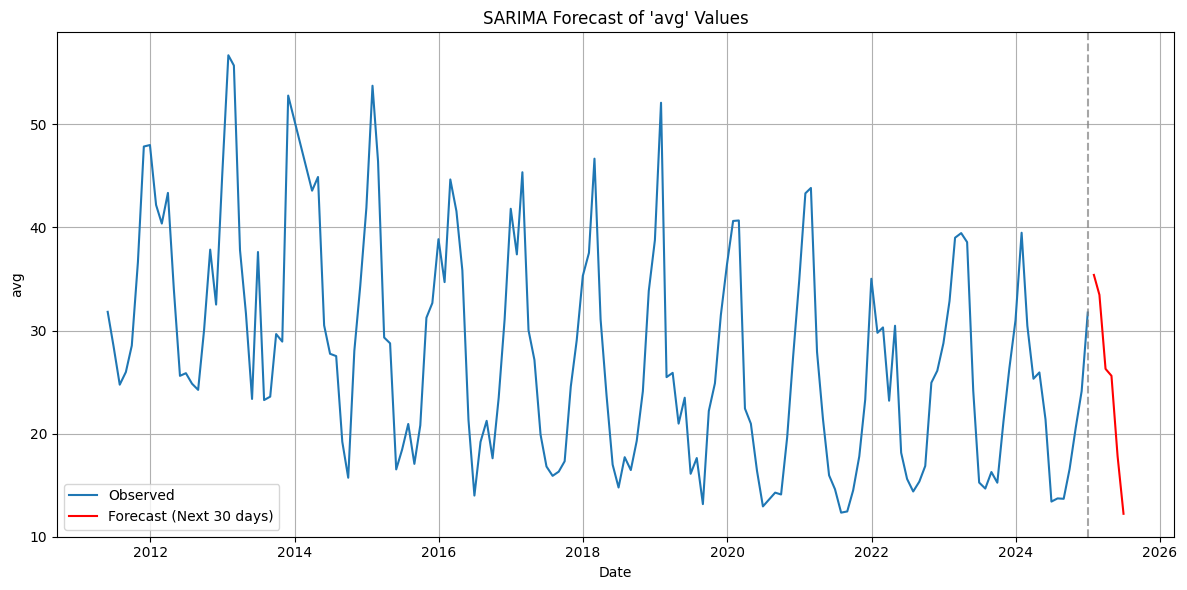

In [2]:
forecast_steps = 6
future_dates = [df.index[-1] + DateOffset(months=i) for i in range(1, forecast_steps + 1)]
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg'], label='Observed')
plt.plot(future_dates, forecast_mean, color='red', label='Forecast (Next 30 days)')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("SARIMA Forecast of 'avg' Values")
plt.xlabel("Date")
plt.ylabel("avg")
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'avg')

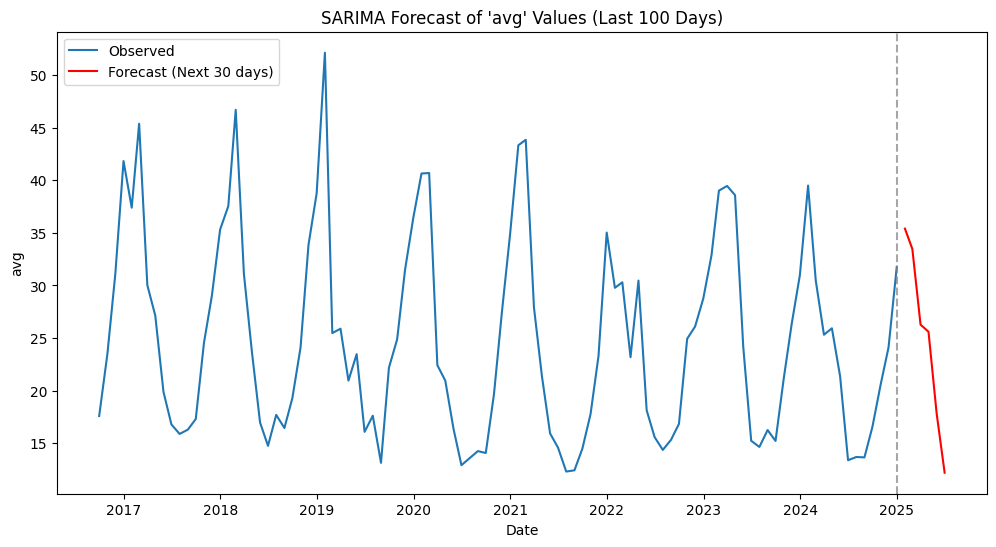

In [3]:
#zoom only last 100 days
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['avg'][-100:], label='Observed')
plt.plot(future_dates, forecast_mean[-100:], color='red', label='Forecast (Next 30 days)')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("SARIMA Forecast of 'avg' Values (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("avg")

In [4]:
# import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))

C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'avg')

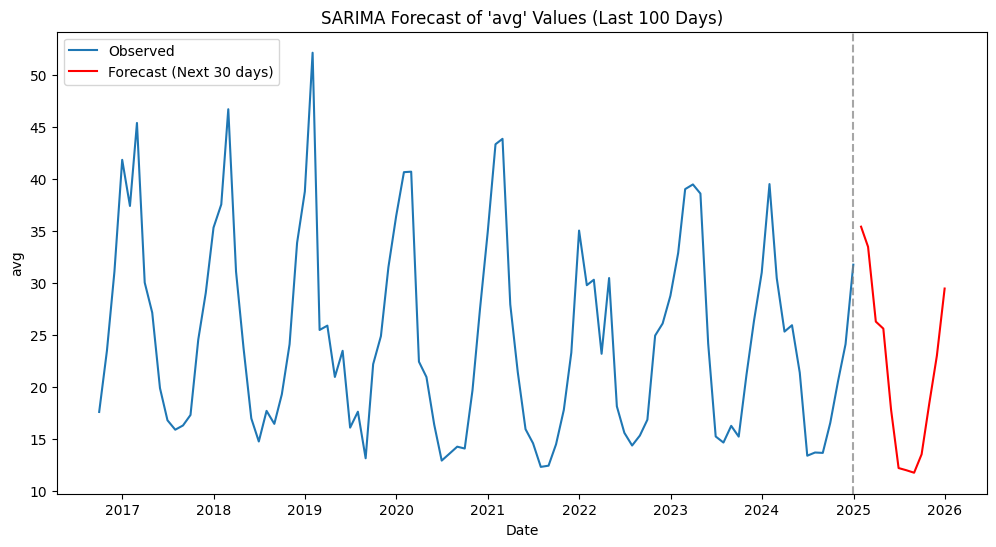

In [5]:
#zoom only last 100 days
forecast_steps = 12
future_dates = [df.index[-1] + DateOffset(months=i) for i in range(1, forecast_steps + 1)]
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['avg'][-100:], label='Observed')
plt.plot(future_dates, forecast_mean[-100:], color='red', label='Forecast (Next 30 days)')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("SARIMA Forecast of 'avg' Values (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("avg")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fix the index and its frequency
# df.set_index('date', inplace=True)
df.index = pd.DatetimeIndex(df.index).to_period('M')

# Train-test split
train = df.iloc[:-6]
test = df.iloc[-6:]

# Fit SARIMA
model = SARIMAX(train['avg'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast
forecast = results.get_forecast(steps=6)
forecast_mean = forecast.predicted_mean

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['avg'], forecast_mean)
rmse = np.sqrt(mean_squared_error(test['avg'], forecast_mean))

# Avoid division by zero in MAPE
nonzero_mask = test['avg'].values != 0
mape = np.mean(
    np.abs((test['avg'].values[nonzero_mask] - forecast_mean.values[nonzero_mask]) / test['avg'].values[nonzero_mask])
) * 100

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE:  1.68
RMSE: 1.87
MAPE: 9.11%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fix the index and its frequency
# df.set_index('date', inplace=True)
df.index = pd.DatetimeIndex(df.index).to_period('M')

# Train-test split
train = df.iloc[:-6]
test = df.iloc[-6:]

# Fit SARIMA
model = SARIMAX(train['avg'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast
forecast = results.get_forecast(steps=6)
forecast_mean = forecast.predicted_mean

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['avg'], forecast_mean)
rmse = np.sqrt(mean_squared_error(test['avg'], forecast_mean))

# Avoid division by zero in MAPE
nonzero_mask = test['avg'].values != 0
mape = np.mean(
    np.abs((test['avg'].values[nonzero_mask] - forecast_mean.values[nonzero_mask]) / test['avg'].values[nonzero_mask])
) * 100

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

C:\Users\poyni\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE:  1.68
RMSE: 1.87
MAPE: 9.11%
